# "[MachineLearning] Ensemble Learning - Bagging"
> KNU AIR week4

- toc: false
- badges: false
- comments: false
- categories: [ensemble learning]
- hide_{github,colab,binder,deepnote}_badge: true

__Content creators:__ 이주형, 이중원

__Content reviewers:__ 

# 1. Overview

### Bagging - Bootstrap Aggregating
+ Each member of the ensemble is constructed from a **different training dataset**.
+ Each dataset is generated by sampling from the total N data examples, choosing N items uniformly at random with replacement.
+ Probability that an instance is not included in a bootstrap(→*Out of Bag, OOB*): \
$p=\left( 1-\frac{1}{N}\right)^N \rightarrow \lim_{N \to \infty} \left( 1-\frac{1}{N}\right)^N = e^{-1} \approx 0.368$

### Result Aggregating for Classification task
+ Voting Strategy
    + Majority Voting
    + Weighting Voting, and the weight could be 
        + validation acc. of individual models
        + predicted prob. for each class
        + can use both for weight
+ Stacking : Result aggregation
    + Use another prediction model, i.e. *meta-classifier*, to aggregate the results
    + Source : Predictions made by ensemble members
    + Target : Actual true label

[Reference](https://github.com/pilsung-kang/Business-Analytics-IME654-)

## Bagging : Examples

In [2]:
%matplotlib inline

from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor as NN
from sklearn.metrics import r2_score
import numpy as np

from matplotlib import pyplot as plt

In [3]:
SEED = 42
X, y = fetch_california_housing(data_home='./', return_X_y=True)

In [4]:
clf = BaggingRegressor( # experiment group
                    base_estimator=NN(),
                    n_estimators=10,
                    max_samples=0.3,
                    oob_score=True,
                    random_state=SEED
                ).fit(X, y)

In [5]:
clf.oob_score_

0.1475162707581028

In [6]:
X_train, y_train = X[np.unique(clf.estimators_samples_),:], y[np.unique(clf.estimators_samples_)]
X_test, y_test = np.delete(X, np.unique(clf.estimators_samples_), axis=0), np.delete(y, np.unique(clf.estimators_samples_))

In [7]:
component_res = []
for estimator in clf.estimators_:
    component_pred = estimator.predict(X_test)
    component_res.append(r2_score(y_test, component_pred))

In [8]:
component_res

[-0.03174907758299472,
 -0.021045219553941896,
 0.003535488064889125,
 -0.03675586372593598,
 -0.005254866062958996,
 0.02225931720479135,
 -0.00932398344070906,
 -0.02436691937209745,
 -0.005065799458619846,
 -0.02227930930171418]

In [9]:
nn_clf = NN().fit(X_train, y_train)
pred = nn_clf.predict(X_test)
nn_clf_score = r2_score(y_test, pred)

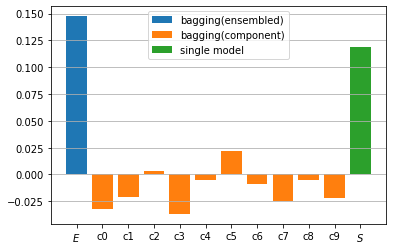

In [10]:
plt.bar([r'$E$'], clf.oob_score_, label='bagging(ensembled)')
plt.bar([f'c{i}' for i in range(10)], component_res, label='bagging(component)')
plt.bar([r'$S$'], nn_clf_score, label='single model')
plt.legend()
plt.grid(axis='y')